In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

import sys
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.patches as mpatches

plt.rc('font', family='Arial')

import warnings
warnings.filterwarnings('ignore')

from qtrendutils import mapplot_utils as mymaps
from qtrendutils import averaging_utils as avg
from matplotlib.patches import Rectangle

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

In [3]:
landfrac = xr.open_dataset("/project/cas/islas/cesm2le/fx/LANDFRAC_LENS2.nc")
landfrac = landfrac.landfrac
landfrac = landfrac.where(landfrac > 0, nan)

### Aridity zone masks

In [4]:
pet_tc = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/Aridity_Index/PET_Terraclim_1980_2020.nc")
pet_tc = pet_tc.mean('time')
ppt_tc = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/Aridity_Index/PPT_Terraclim_1980_2020.nc")
ppt_tc = ppt_tc.mean('time')
aridity = ppt_tc.ppt / pet_tc.pet
aridity['lon'] = landfrac.lon ; aridity['lat'] = landfrac.lat

aridmask = landfrac.where( (aridity > 0.05) & (aridity < 0.5), nan)
humidmask = landfrac.where( (aridity >= 0.5), nan)
hyperaridmask = landfrac.where( (aridity <= 0.05), nan)

aridmask = aridmask.where( aridmask.lat > -60, nan)
humidmask = humidmask.where( humidmask.lat > -60, nan)
hyperaridmask = hyperaridmask.where(hyperaridmask.lat > -60, nan)

landmask = landfrac.where( landfrac.lat > -60, nan)

### ERA5 specific humidity trend normalized per K

In [5]:
datpath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/"
era5vp_map = xr.open_dataset(datpath+'vptrends_ERA5.nc')
era5vp_map['lon'] = landfrac.lon ; era5vp_map['lat'] = landfrac.lat
era5q_map = era5vp_map.q

era5vp_clim = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_1990_clims/vpclims_ERA5.nc")
era5vp_clim['lon'] = landfrac.lon ; era5vp_clim['lat'] = landfrac.lat
era5q_clim = era5vp_clim.q

era5landT_trend = era5vp_map.T2m*landmask
era5landT_trend_m = avg.cosweightlonlat(era5landT_trend, 0, 360, -90, 90)

era5_q_trend_pcnt = (era5q_map / era5q_clim)*100.
#---Issues with normalizing locally since some T trends are near zero
#era5_q_trend_pcnt_norm = era5_q_trend_pcnt / era5vp_map.T2m
#---so normalizing by the land mean temperature instead
era5_q_trend_pcnt_norm = era5_q_trend_pcnt / era5landT_trend_m

### Observation-based precip

In [6]:
gpcp_map = xr.open_dataset(datpath+'prtrends_GPCP.nc')
gpcp_map['lon'] = landfrac.lon ; gpcp_map['lat'] = landfrac.lat
gpcc_map = xr.open_dataset(datpath+'prtrends_GPCC.nc')
gpcc_map['lon'] = landfrac.lon ; gpcc_map['lat'] = landfrac.lat
cruts_map = xr.open_dataset(datpath+'prtrends_CRUTS.nc')
cruts_map['lon'] = landfrac.lon ; cruts_map['lat'] = landfrac.lat

### Model data

In [7]:
cmip6vp_map = xr.open_dataset('/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_CMIP6.nc')
cmip6vp_map['lon'] = landfrac.lon ; cmip6vp_map['lat'] = landfrac.lat
cmip6q_map = cmip6vp_map.q

cmip6vp_clim = xr.open_dataset('/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_1990_clims/vpclims_CMIP6.nc')
cmip6vp_clim['lon'] = landfrac.lon ; cmip6vp_clim['lat'] = landfrac.lat
cmip6q_clim = cmip6vp_clim.q

cmip6_q_trend_pcnt = (cmip6q_map / cmip6q_clim)*100.

#----Issues with normalizing locally since some T trends are near zero
#cmip6_q_trend_pcnt_norm = cmip6_q_trend_pcnt / cmip6vp_map.tas
cmip6_t_trend = avg.cosweightlonlat(cmip6vp_map.tas*landfrac,0,360,-90,90)
cmip6_q_trend_pcnt_norm = cmip6_q_trend_pcnt / cmip6_t_trend

cmip6pr_map = xr.open_dataset(datpath+'prtrends_CMIP6.nc')*86400.
cmip6pr_map['lon'] = landfrac.lon ; cmip6pr_map['lat'] = landfrac.lat
cmip6pr_map = cmip6pr_map.pr


lens2vp_map = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_LENS2.nc")
lens2vp_map['lon'] = landfrac.lon ; lens2vp_map['lat'] = landfrac.lat
lens2q_map = lens2vp_map.q

lens2pr_map = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/prtrends_LENS2.nc")
lens2pr_map['lon'] = landfrac.lon ; lens2pr_map['lat'] = landfrac.lat

lens2vp_clim = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_1990_clims/vpclims_LENS2.nc")
lens2vp_clim['lon'] = landfrac.lon ; lens2vp_clim['lat'] = landfrac.lat
lens2q_clim = lens2vp_clim.q

lens2_q_trend_pcnt = (lens2q_map / lens2q_clim)*100.

lens2_t_trend = avg.cosweightlonlat(lens2vp_map.TREFHT*landfrac,0,360,-90,90)
lens2_q_trend_pcnt_norm = lens2_q_trend_pcnt / lens2_t_trend

In [8]:
cmip6q_map_1mem = cmip6_q_trend_pcnt_norm.isel(member=0)
cmip6pr_map_1mem = cmip6pr_map.isel(member=0)

cmip6q_map = cmip6_q_trend_pcnt_norm.stack(z=['model','member'])
cmip6pr_map = cmip6pr_map.stack(z=['model','member'])

testpoint = cmip6q_map.sel(lon=180, lat=0, method='nearest')

cmip6q_map = cmip6q_map.where( ~np.isnan(testpoint), drop=True )
cmip6pr_map = cmip6pr_map.where( ~np.isnan(testpoint), drop=True )

In [9]:
cmip6q_arid = cmip6q_map_1mem*aridmask ; cmip6pr_arid = cmip6pr_map_1mem*aridmask
cmip6q_arid = cmip6q_arid.stack(z=['lon','lat']).dropna('z')
cmip6pr_arid = cmip6pr_arid.stack(z=['lon','lat']).dropna('z')

cmip6q_arid_allmem = cmip6q_map*aridmask ; cmip6pr_arid_allmem = cmip6pr_map*aridmask
cmip6q_arid_allmem = cmip6q_arid_allmem.stack(loc=['lon','lat']).dropna('loc')
cmip6pr_arid_allmem = cmip6pr_arid_allmem.stack(loc=['lon','lat']).dropna('loc')

lens2q_arid = lens2_q_trend_pcnt_norm*aridmask ; lens2pr_arid = lens2pr_map*aridmask
lens2q_arid = lens2q_arid.stack(z=['lon','lat']).dropna('z')
lens2pr_arid = lens2pr_arid.stack(z=['lon','lat']).dropna('z')


#----basing which grid points to drop on GPCC since it has a few extra NaN's around the coast
gpcc_arid = gpcc_map*aridmask 
gpcc_arid = gpcc_arid.stack(z=['lon','lat'])#.dropna('z')

cruts_arid = cruts_map*aridmask
cruts_arid = cruts_arid.stack(z=['lon','lat'])
cruts_arid = cruts_arid.where( ~np.isnan(gpcc_arid), drop=True)
gpcp_arid = gpcp_map*aridmask
gpcp_arid = gpcp_arid.stack(z=['lon','lat'])
gpcp_arid = gpcp_arid.where( ~np.isnan(gpcc_arid), drop=True)
era5_arid = era5_q_trend_pcnt_norm*aridmask
era5_arid = era5_arid.stack(z=['lon','lat'])
era5_arid = era5_arid.where( ~np.isnan(gpcc_arid.pr), drop=True)
gpcc_arid = gpcc_arid.dropna("z")

In [10]:
# Drop lingering NaN's
idrop = np.argwhere( np.isnan(np.array(cruts_arid.pr)) | np.isnan(np.array(gpcp_arid.pr)) | np.isnan(np.array(gpcc_arid.pr)) | np.isnan(np.array(era5_arid)) )
cruts_arid = cruts_arid.drop_isel(z=idrop)
gpcp_arid = gpcp_arid.drop_isel(z=idrop)
gpcc_arid = gpcc_arid.drop_isel(z=idrop)
era5_arid = era5_arid.drop_isel(z=idrop)

In [11]:
def setupjointpdf( vpdata, svpdata, weights ):
    X, Y = np.mgrid[-1.500:1.525:122j, -25:25.5:102j] # probabilities represent per (0.025 precip, 0.5%/K)
    positions = np.vstack([X.ravel(), Y.ravel()])
    
    xplot = vpdata.flatten()
    yplot = svpdata.flatten()
    inputdata = np.vstack([xplot, yplot])
    kernel = stats.gaussian_kde(inputdata, weights=weights)
    Z = np.reshape(kernel(positions).T, X.shape)
    Z = np.moveaxis(Z, 1, 0)
    Xout = X[:,0] ; Yout = Y[0,:]
    return Z, Xout, Yout

### CMIP6 joint PDF

In [12]:
X, Y = np.mgrid[-1.500:1.525:122j, -25:25.5:102j]

In [13]:
for imodel in np.arange(0,cmip6q_arid.model.size,1):
    prdat = cmip6pr_arid.isel(model=imodel)
    qdat = cmip6q_arid.isel(model=imodel)
    w = np.cos(np.deg2rad(prdat.lat))
    zi, x, y = setupjointpdf(np.array(prdat), np.array(qdat), w)
    if (imodel == 0):
        zcmip6_weighted = xr.DataArray(np.zeros([cmip6pr_arid.model.size, len(y), len(x)]),
                                       coords=[cmip6pr_arid.model, y, x], dims=['model','y','x'], name='cmip6_prob')
    zcmip6_weighted[imodel,:,:] = zi[:,:]

### LENS2 joint PDF

In [14]:
for imem in np.arange(0,lens2q_arid.M.size,1):
    prdat = lens2pr_arid.isel(M=imem)
    qdat = lens2q_arid.isel(M=imem)
    w = np.cos(np.deg2rad(prdat.lat))
    zi, x, y = setupjointpdf(np.array(prdat.pr), np.array(qdat), w)
    if (imem == 0):
        zlens2_weighted = xr.DataArray(np.zeros([lens2pr_arid.M.size, len(y), len(x)]),
                                       coords=[lens2pr_arid.M, y, x], dims=['M','y','x'], name='lens2_prob')
    zlens2_weighted[imem,:,:] = zi[:,:]

### Observed joint PDF

In [15]:
zgpcp, x, y = setupjointpdf(np.array(gpcp_arid.pr), np.array(era5_arid), np.cos(np.deg2rad(era5_arid.lat)))
zgpcc, x, y = setupjointpdf(np.array(gpcc_arid.pr), np.array(era5_arid), np.cos(np.deg2rad(era5_arid.lat)))
zcruts, x, y = setupjointpdf(np.array(cruts_arid.pr), np.array(era5_arid), np.cos(np.deg2rad(era5_arid.lat)))

### 1D PDFs

In [16]:
bsizeq = 0.5
qbins = np.arange(-20,20.2,bsizeq)

#-----CMIP6
cmip6_arid_1dpdf = np.zeros([cmip6q_arid_allmem.z.size, len(qbins)])
cmip6_0pr_1dpdf = np.zeros([cmip6q_arid_allmem.z.size, len(qbins)])

plt0_cmip6_arid = np.zeros([cmip6q_arid_allmem.z.size])
plt0_cmip6_0pr = np.zeros([cmip6q_arid_allmem.z.size])

for imem in np.arange(0,cmip6q_arid_allmem.z.size,1):
    datq = cmip6q_arid_allmem.isel(z=imem)
    datpr = cmip6pr_arid_allmem.isel(z=imem)
    
    weights = np.cos(np.deg2rad(datq.lat))
    weights = weights.rename('weights')
    datq = datq.rename('q')
    datpr = datpr.rename('pr')
    datq = xr.merge([datq, weights])
    
    kernel = stats.gaussian_kde(datq.q, weights = np.array(weights))
    cmip6_arid_1dpdf[imem,:] = kernel(qbins)*100.*bsizeq
    
    lt0 = datq.where( datq.q < 0, drop=True)
    plt0_cmip6_arid[imem] = (np.sum(lt0.weights) / np.sum(datq.weights))*100.
    
    datq = datq.where( (datpr > -0.05) & (datpr  < 0.05), drop=True)
    
    lt0 = datq.where(datq.q < 0, drop=True)
    plt0_cmip6_0pr[imem] = (np.sum(lt0.weights) / np.sum(datq.weights))*100.
    
    kernel = stats.gaussian_kde(datq.q, weights = np.array(datq.weights))
    cmip6_0pr_1dpdf[imem,:] = kernel(qbins)*100.*bsizeq


#-----LENS2
lens2_arid_1dpdf = np.zeros([lens2q_arid.M.size, len(qbins)])
lens2_0pr_1dpdf = np.zeros([lens2q_arid.M.size, len(qbins)])

plt0_lens2_arid = np.zeros([lens2q_arid.M.size])
plt0_lens2_0pr = np.zeros([lens2q_arid.M.size])

for imem in np.arange(0,lens2q_arid.M.size,1):
    datq = lens2q_arid.isel(M=imem)
    datpr = lens2pr_arid.isel(M=imem).pr
    
    weights = np.cos(np.deg2rad(datq.lat))
    weights = weights.rename('weights')
    datq = datq.rename('q')
    datpr = datpr.rename('pr')
    datq = xr.merge([datq, weights])
    
    kernel = stats.gaussian_kde(datq.q, weights=weights)
    lens2_arid_1dpdf[imem,:] = kernel(qbins)*100.*bsizeq
    lt0 = datq.where(datq.q < 0, drop=True)
    plt0_lens2_arid[imem] = (np.sum(lt0.weights) / np.sum(datq.weights))*100.
    
    datq = datq.where( (datpr > -0.05) & (datpr < 0.05), drop=True)
    datpr = datpr.where( (datpr > -0.05) & (datpr < 0.05), drop=True)
    
    lt0 = datq.where(datq.q < 0, drop=True)
    plt0_lens2_0pr[imem] = (np.sum(lt0.weights) / np.sum(datq.weights))*100.
    
    kernel = stats.gaussian_kde(datq.q, weights = np.array(datq.weights))
    lens2_0pr_1dpdf[imem,:] = kernel(qbins)*100.*bsizeq
    
    
weights = np.cos(np.deg2rad(era5_arid.lat))
weights = weights.rename('weights')
kernel = stats.gaussian_kde(era5_arid, weights=weights)
era5_arid_1dpdf = kernel(qbins)*100.*bsizeq
era5_arid = era5_arid.rename('q')
era5dat = xr.merge([era5_arid, weights])

lt0 = era5dat.where( era5dat.q < 0, drop=True)
plt0_era5_arid = (np.sum(lt0.weights) / np.sum(era5dat.weights))*100.

datq = era5dat.where( (gpcc_arid.pr > -0.05) & (gpcc_arid.pr < 0.05), drop=True)
kernel = stats.gaussian_kde(datq.q, weights=datq.weights)
era5_0pr_1dpdf = kernel(qbins)*100.*bsizeq

lt0 = datq.where( datq.q < 0, drop=True)
plt0_era5_0pr = (np.sum(lt0.weights)/np.sum(datq.weights))*100.
#------------------------   

### Bin the data

In [17]:
bins = np.arange(-0.325,0.325,0.05)
digitized = np.digitize(gpcc_arid.pr, bins)
weights = np.cos(np.deg2rad(gpcc_arid.lat))
pr_obs = [ ( ((gpcc_arid.pr[digitized == i]*weights[digitized == i]).sum('z')) / weights[digitized == i].sum('z') ) for i in range(0,len(bins)) ]
q_obs = [ ( ((era5_arid[digitized == i]*weights[digitized == i]).sum('z')) / weights[digitized == i].sum('z') ) for i in range(0,len(bins)) ]

pr_cmip6 = xr.DataArray(np.zeros([cmip6q_arid.model.size, len(bins)]), coords=[cmip6q_arid.model, bins], dims=['model','bin'], name='pr')
q_cmip6 = xr.DataArray(np.zeros([cmip6q_arid.model.size, len(bins)]), coords=[cmip6q_arid.model, bins], dims=['model','bin'], name='q')

for imodel in np.arange(0,cmip6q_arid.model.size,1):
    prdat = cmip6pr_arid.isel(model=imodel)
    qdat = cmip6q_arid.isel(model=imodel)
    w = np.cos(np.deg2rad(prdat.lat))
    digitized = np.digitize(prdat, bins)
    pr_cmip6[imodel,:] =  [ ( ((prdat[digitized == i]*w[digitized == i]).sum('z')) / w[digitized == i].sum('z') ) for i in range(0,len(bins)) ]
    q_cmip6[imodel,:] = [ ( ((qdat[digitized == i]*w[digitized == i]).sum('z')) / w[digitized == i].sum('z') ) for i in range(0,len(bins)) ]
    
pr_lens2 = xr.DataArray(np.zeros([lens2q_arid.M.size, len(bins)]), coords=[lens2q_arid.M, bins], dims=['M','bin'], name='pr')
q_lens2 = xr.DataArray(np.zeros([lens2q_arid.M.size, len(bins)]), coords=[lens2q_arid.M, bins], dims=['M','bin'], name='q')
for imem in np.arange(0,lens2q_arid.M.size,1):
    prdat = lens2pr_arid.isel(M=imem)
    qdat = lens2q_arid.isel(M=imem)
    w = np.cos(np.deg2rad(prdat.lat))
    digitized = np.digitize(prdat.pr, bins)
    pr_lens2[imem,:] = [ ( ((prdat.pr[digitized == i]*w[digitized == i]).sum('z')) / w[digitized == i].sum('z') ) for i in range(0,len(bins)) ]
    q_lens2[imem,:] = [ ( ((qdat[digitized == i]*w[digitized == i]).sum('z')) / w[digitized == i].sum('z') ) for i in range(0,len(bins)) ]    

### Set up the plot

In [18]:
def setup_q_vs_pr(x1, x2, y1, y2, titlestr, yticks=True):
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_ylim(-13,17)
    ax.set_xlim(-0.4,0.4)
    
    ax.plot([0,0],[-13,17], color='black')
    ax.plot([-0.4,0.4],[0,0], color='black')
    
    ax.set_yticks([-10,-5,0,5,10,15])
    ax.set_xticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4])

    if (yticks):  
        ax.set_yticklabels(['-10','-5','0','5','10','15'], fontsize=14)
        ax.set_ylabel('Specific Humidity Trend (%/K)', fontsize=14)
    else:
        ax.set_yticklabels([' ',' ',' ',' ',' ',' '], fontsize=14)
        
    ax.set_xticklabels(['-0.4','-0.3','-0.2','-0.1','0','0.1','0.2','0.3','0.4'], fontsize=14)
    
    ax.set_xlabel('Precipitation trend (mm/day/41y)', fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    
    return ax

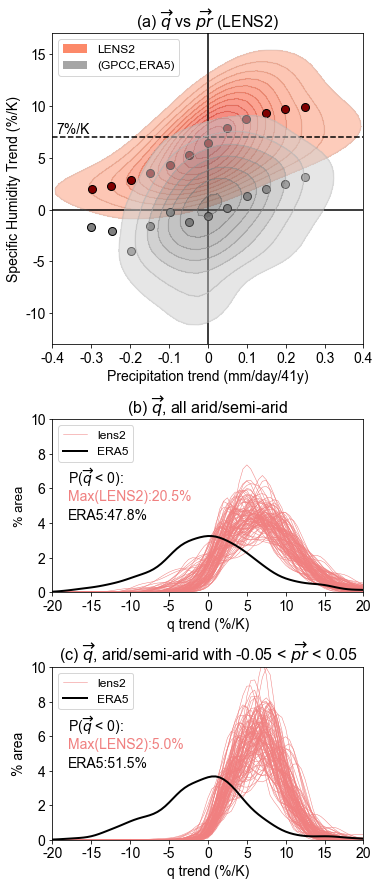

In [19]:
fig = plt.figure(figsize=(16,16))


#--------------Panel b
ax = setup_q_vs_pr(0.4,0.67,0.73,1,'(a) $\overrightarrow{q}$ vs $\overrightarrow{pr}$ (LENS2)')

cmin=0.04 ; cmax=0.42 ; ci=0.02
ncontours = (cmax - cmin)/ci + 1
colors = plt.cm.Greys(np.linspace(0.3,1,np.int(ncontours+1-6)))
cmap = mpl.colors.ListedColormap(colors)
ax.contourf(x, y, zgpcc, cmap=cmap, levels=np.arange(cmin, cmax-6*ci, ci), alpha=0.5, zorder=10, label='(GPCP, ERA5)')
ax.contour(x, y, zgpcc, levels=np.arange(cmin, cmax, ci), colors='gray', alpha=0.15, zorder=11)
obslegend = Rectangle((0.95,0.95),5,3,facecolor=colors[3])

colors = plt.cm.Reds(np.linspace(0.3,1,np.int(ncontours)+1))
cmap = mpl.colors.ListedColormap(colors)
ax.contourf(x, y, zlens2_weighted.mean('M'), cmap=cmap, levels=np.arange(cmin, cmax, ci), alpha=0.6, label='(CMIP6,CMIP6)')
ax.contour(x, y, zlens2_weighted.mean('M'), levels=np.arange(cmin, cmax, ci), colors='gray', alpha=0.15)
lenslegend = Rectangle((0.95,0.95),5,3,facecolor=colors[3])

plt.plot(pr_obs, q_obs, "o", markeredgecolor='black', markerfacecolor='gray', markersize=8)
plt.plot(pr_lens2.mean('M'), q_lens2.mean('M'),"o", markeredgecolor='black', markerfacecolor='maroon', markersize=8)

ax.plot([-0.4,0.4],[7,7], color='black', linestyle='dashed')
ax.text(-0.39,7.1,'7%/K', fontsize=14, ha='left', va='bottom')

legendparts = [lenslegend, obslegend]
legendlabels = ['LENS2','(GPCC,ERA5)']
ax.legend(legendparts, legendlabels, loc='upper left', prop={'size': 12})
#---------------


#-----------panel d
ax = fig.add_axes([0.4,0.515,0.27,0.15])
ax.set_xlim(-20,20)
ax.set_title('(b) $\overrightarrow{q}$, all arid/semi-arid', fontsize=16)
ax.set_xticks([-20,-15,-10,-5,0,5,10,15,20])
ax.set_xticklabels(['-20','-15','-10','-5','0','5','10','15','20'], fontsize=14)
ax.set_ylim(0,10)
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['0','2','4','6','8','10'], fontsize=14)
ax.set_ylabel('% area', fontsize=13)
ax.set_xlabel('q trend (%/K)', fontsize=14)

for imem in np.arange(0,lens2q_arid.M.size,1):
    ax.plot(qbins, lens2_arid_1dpdf[imem,:], color='lightcoral', linewidth=0.5, label='lens2' if imem == 0 else "")
ax.plot(qbins, era5_arid_1dpdf, color='black', linewidth=2, label='ERA5')
ax.legend(loc = 'upper left', prop={'size':12})

ax.text(-18,6,'P($\overrightarrow{q}$ < 0):', ha='left', va='bottom', fontsize=14)
ax.text(-18,5.1,'Max(LENS2):'+"{0:.1f}".format(np.max(plt0_lens2_arid))+"%", ha='left', va='bottom', fontsize=14, color='lightcoral')
ax.text(-18,4,'ERA5:'+"{0:.1f}".format(plt0_era5_arid.values)+'%', ha='left', va='bottom', fontsize=14)
#------------------

#----------panel f
ax = fig.add_axes([0.4,0.3,0.27,0.15])
ax.set_xlim(-20,20)
ax.set_ylim(0,10)
ax.set_title('(c) $\overrightarrow{q}$, arid/semi-arid with -0.05 < $\overrightarrow{pr}$ < 0.05', fontsize=16)
ax.set_xticks([-20,-15,-10,-5,0,5,10,15,20])
ax.set_xticklabels(['-20','-15','-10','-5','0','5','10','15','20'], fontsize=14)
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['0','2','4','6','8','10'], fontsize=14)
ax.set_ylabel('% area', fontsize=14)
ax.set_xlabel('q trend (%/K)', fontsize=14)

for imem in np.arange(0,lens2q_arid.M.size,1):
    ax.plot(qbins, lens2_0pr_1dpdf[imem,:], color='lightcoral', linewidth=0.5, label='lens2' if imem == 0 else "")
ax.plot(qbins, era5_0pr_1dpdf, color='black', linewidth=2, label='ERA5')

ax.legend(loc = 'upper left', prop={'size':12})

ax.text(-18,6,'P($\overrightarrow{q}$ < 0):', ha='left', va='bottom', fontsize=14)
ax.text(-18,5.1,'Max(LENS2):'+"{0:.1f}".format(np.max(plt0_lens2_0pr))+"%", ha='left', va='bottom', fontsize=14, color='lightcoral')
ax.text(-18,4,'ERA5:'+"{0:.1f}".format(plt0_era5_0pr.values)+'%', ha='left', va='bottom', fontsize=14)

fig.savefig(plotpath+'figS16.pdf', bbox_inches='tight', facecolor='white')